In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print("Environment Ready")

Environment Ready


Name: Sagar Bhetwal  
Course: [Advanced Big Data and Data Mining]  
Lab Title: K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) Classification using Wine Dataset  
Date: [Feb 14 2026]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

In [6]:
wine = load_wine()

X = wine.data
y = wine.target

print("Feature Names:\n", wine.feature_names)
print("\nNumber of Samples:", X.shape[0])
print("Number of Features:", X.shape[1])
print("\nClass Names:", wine.target_names)

Feature Names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Number of Samples: 178
Number of Features: 13

Class Names: ['class_0' 'class_1' 'class_2']


In [7]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print(df.head())
print("\nClass Distribution:")
print(df['target'].value_counts())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

k = 1, Accuracy = 0.9722
k = 5, Accuracy = 0.9722
k = 11, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 21, Accuracy = 1.0000


In [11]:
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    try:
        rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
        rnn.fit(X_train, y_train)

        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        rnn_accuracies.append(acc)
        print(f"Radius = {r}, Accuracy = {acc:.4f}")

    except Exception as e:
        rnn_accuracies.append(0)
        print(f"Radius = {r}, Error occurred")


Radius = 350, Accuracy = 0.3889
Radius = 400, Accuracy = 0.3889
Radius = 450, Accuracy = 0.3889
Radius = 500, Accuracy = 0.3889
Radius = 550, Accuracy = 0.3889
Radius = 600, Accuracy = 0.3889


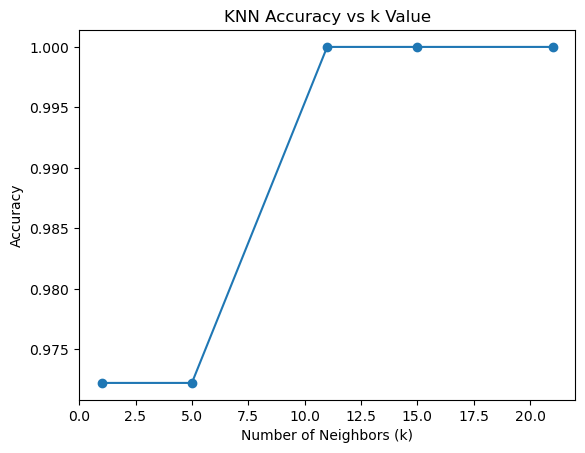

In [12]:
plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k Value")
plt.show()

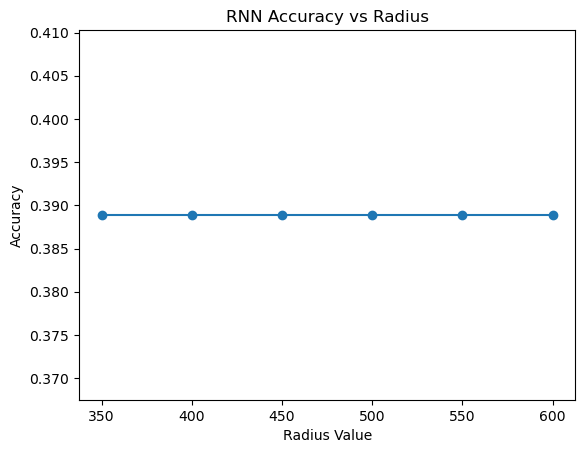

In [13]:
plt.figure()
plt.plot(radius_values, rnn_accuracies, marker='o')
plt.xlabel("Radius Value")
plt.ylabel("Accuracy")
plt.title("RNN Accuracy vs Radius")
plt.show()

In [14]:
results_df = pd.DataFrame({
    "K Value": k_values,
    "KNN Accuracy": knn_accuracies
})

rnn_results_df = pd.DataFrame({
    "Radius Value": radius_values,
    "RNN Accuracy": rnn_accuracies
})

print("KNN Results")
display(results_df)

print("\nRNN Results")
display(rnn_results_df)

KNN Results


,K Value,KNN Accuracy
0,1,0.972222
1,5,0.972222
2,11,1.000000
3,15,1.000000
4,21,1.000000



RNN Results


,Radius Value,RNN Accuracy
0,350,0.388889
1,400,0.388889
2,450,0.388889
3,500,0.388889
4,550,0.388889
5,600,0.388889


In [16]:
knn_table = pd.DataFrame({
    "k": k_values,
    "Accuracy": knn_accuracies
})

rnn_table = pd.DataFrame({
    "radius": radius_values,
    "Accuracy": rnn_accuracies
})

display(knn_table)
display(rnn_table)

,k,Accuracy
0,1,0.972222
1,5,0.972222
2,11,1.000000
3,15,1.000000
4,21,1.000000


,radius,Accuracy
0,350,0.388889
1,400,0.388889
2,450,0.388889
3,500,0.388889
4,550,0.388889
5,600,0.388889
